
## Linear Regression Assignment
## Bike sharing demand prediction
### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Assignment Workflow

**1.Data understanding**<br>
1.Import libraries required<br>
2.Load dataset<br>
3.identify info,description,shape & size<br>
4.Identify first and last 5 rows<br>

**2.DataCleaning & manipulation**<br>
1.Identify and resolve missing values<br>
2.Identify and resolve data redundancy<br>
3.Identify and convert to proper datatypes<br>
4.Identify and create derived columns wherever required<br>

**3.EDA process**<br>
1.Define functions
2.Univariant Analysis<br>
3.Segmented Analysis<br>
4.Bivarient Analysis<br>
5.Identify correlation<br>
6.Identify 5 important driver variables<br>
7.Make correct assumptions<br>


**4.Model Building & Evaluation**<br>

**4.Simple Linear Regression Model<br>

**4.Multiple Linear Regression Model<br>

**4.Prediction<br>

**3.Subjective Questions-PDF**<br>



# Data understandng
#### Import Libraries required for data analysis in EDA

In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')



In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

ModuleNotFoundError: No module named 'google.colab'

#### Load & read dataset from folder path

In [395]:
bs_data = pd.read_csv('day.csv')
#reading the data
bs_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

=========================================
Dataset characteristics
=========================================
day.csv have the following fields:

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [396]:
#find top 5 rows of dataset
bs_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [397]:
#find last 5 rows of dataset
bs_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


from head and tail data we can infer that it contains data for 2018 and 2019. And from the column yr which is 0 and 1 , we can infer that it is against 2018 and 2019 respectively

In [398]:
#shape of bs_data- relates to the size of the dimensions of an N-dimensional array.
#it contains 730 rows and 116 columns
bs_data.shape

(730, 16)

In [400]:
#size of loan_data-the amount of data is 730x16=11680
bs_data.size

11680

In [401]:
#identify  day.csv dataset description
bs_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [402]:
#identify  bs_data info
print(bs_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


## Data Cleaning

#### Missing value imputatation

In [403]:
#Identify missing value columns there in dataset
missing_values=bs_data.isna().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [404]:
#no:of columns computed for  missing value
missing_values.count()

16

From the above missing value imputation, we can infer that all the 16 columns data doesnt contain any missing value hence it is 0.

#### Data type conversions

In [405]:
# Finding datatype of all coulmns
print(bs_data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


#### Handling date columns

from above datatypes, it is visible that the date information-dteday column is in object data type.
So dteday column will be converted to  date column

In [406]:
# Converting date to datetime format
bs_data['dteday']=bs_data['dteday'].astype('datetime64')


In [407]:
bs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [408]:
bs_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Identify Categorical variables & its unique values:

In [330]:
#We could see that season, month,weekday and weathersit columns having
#values in integer. Lets look into the unique values

In [409]:
#Identify season column unique values
print("season :",bs_data.season.unique())
#Identify month column unique values
print("month :",bs_data.mnth.unique())
#Identify weathersit column unique values
print("weathersit :",bs_data.weathersit.unique())
#Identify workingday column unique values
print("workingday :",bs_data.workingday.unique())
#Identify weekday column unique values
print("weekday :",bs_data.weekday.unique())


season : [1 2 3 4]
month : [ 1  2  3  4  5  6  7  8  9 10 11 12]
weathersit : [2 1 3]
workingday : [0 1]
weekday : [6 0 1 2 3 4 5]


In [19]:
##### Create custom mapping for categorical variables

In [410]:
bs_data['season'].astype('category').value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [411]:
#changing categorical numeric value of season column into meaningful names
bs_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bs_data['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [412]:
# A function to  map the actual numbers of month to categorical names.
def month_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the mnth columns
bs_data[['mnth']] = bs_data[['mnth']].apply(month_map)


bs_data['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [226]:
bs_data['weekday'].astype('category').value_counts()

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [413]:
# map the actual numbers of weekday column to categorical names.


#Mapping Weekday
bs_data.weekday = bs_data.weekday.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Lets overl
bs_data['weekday'].astype('category').value_counts()


Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

In [230]:
bs_data['weathersit'].astype('category').value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [415]:
# Replacing  weathersit numeric values into string values for better readability

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
bs_data.loc[(bs_data['weathersit'] == 1) , 'weathersit'] = 'Clear'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
bs_data.loc[(bs_data['weathersit'] == 2) , 'weathersit'] = 'Mist_Cloudy'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
bs_data.loc[(bs_data['weathersit'] == 3) , 'weathersit'] = 'Light_Snow_Rain'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bs_data.loc[(bs_data['weathersit'] == 4) , 'weathersit'] = 'Heavy_Rain_Thunder'


bs_data['weathersit'].astype('category').value_counts()

Clear              463
Mist_Cloudy        246
Light_Snow_Rain     21
Name: weathersit, dtype: int64

In [232]:
# whether day is a holiday or not (0: No, 1: Yes)
bs_data['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [336]:
# whether day is a holiday or not (0: No, 1: Yes)
bs_data['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

# Drop unwanted variables



As per the data dictionary provided
- instant: record index(no use in analysis & model building, hence we can drop it)
- dteday: since we have month and weekday, we can drop this
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
-  Hence cnt is the sum of casual and registered users, we can drop casual and registered.

In [416]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
bs_data=bs_data.drop(['instant','dteday','casual','registered'], axis = 1, inplace = False)

bs_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# EDA

###  Data Visualization using Univariate and Bivariate analysis



#### Univariate Analysis

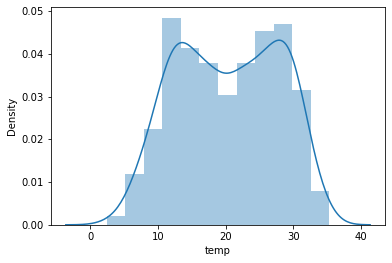

In [417]:
# temperature
sns.distplot(bs_data['temp'])
plt.show()

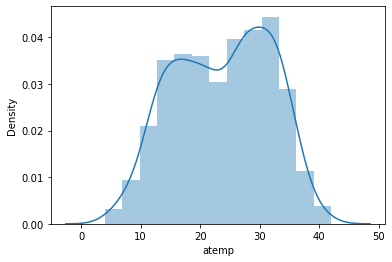

In [ ]:
# feeling temperature
sns.distplot(bs_data['atemp'])
plt.show()

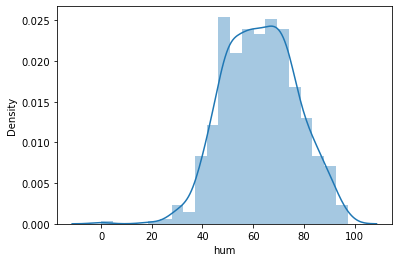

In [ ]:
# humidity
sns.distplot(bs_data['hum'])
plt.show()

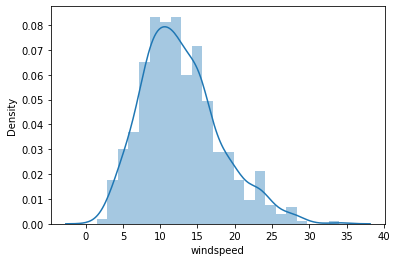

In [ ]:
# wind speed
sns.distplot(bs_data['windspeed'])
plt.show()

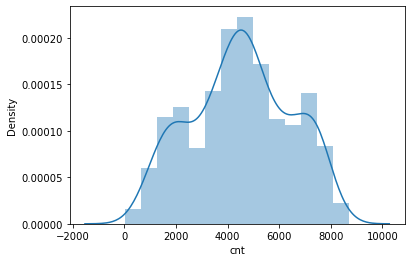

In [ ]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(bs_data['cnt'])
plt.show()

### Visualize data using pair plots

<Figure size 1080x2160 with 0 Axes>

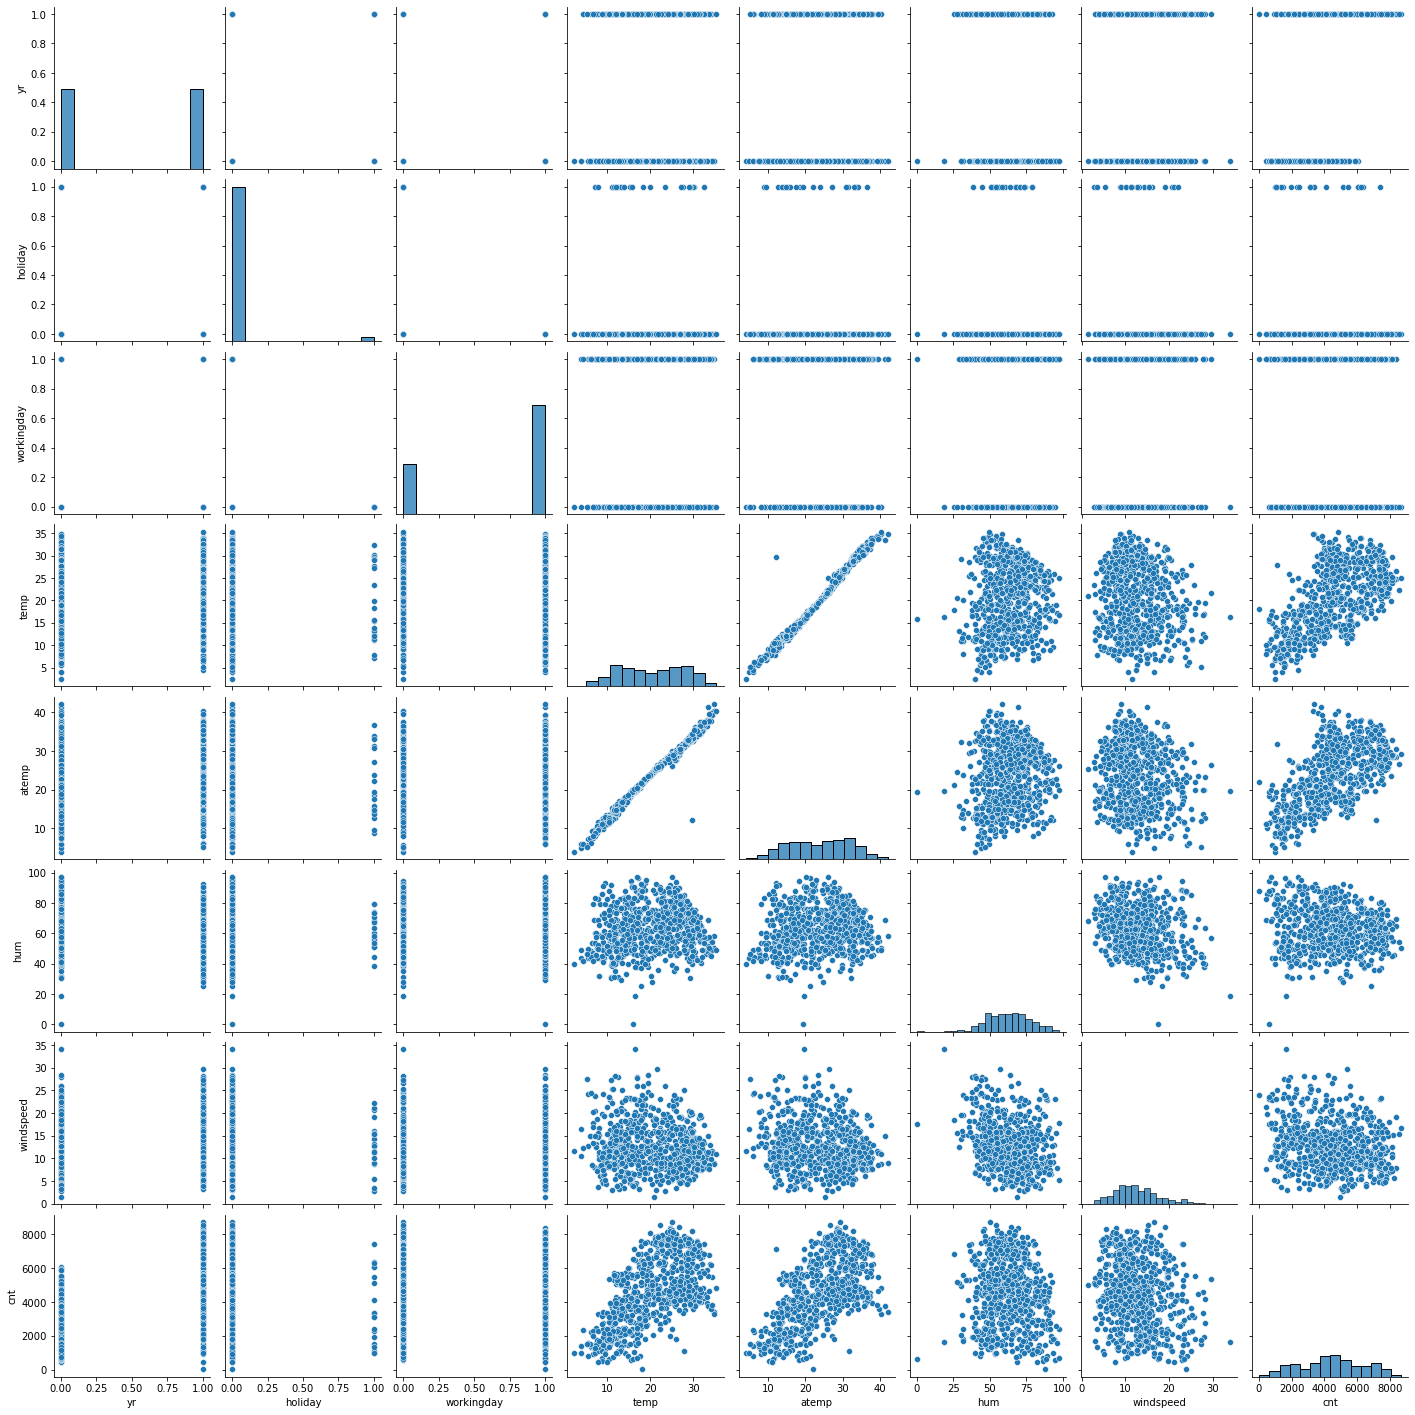

In [31]:
plt.figure(figsize = (15,30))
sns.pairplot(bs_data)
plt.show()

### Visualising data to find correlation from numerical variables

<Figure size 1080x2160 with 0 Axes>

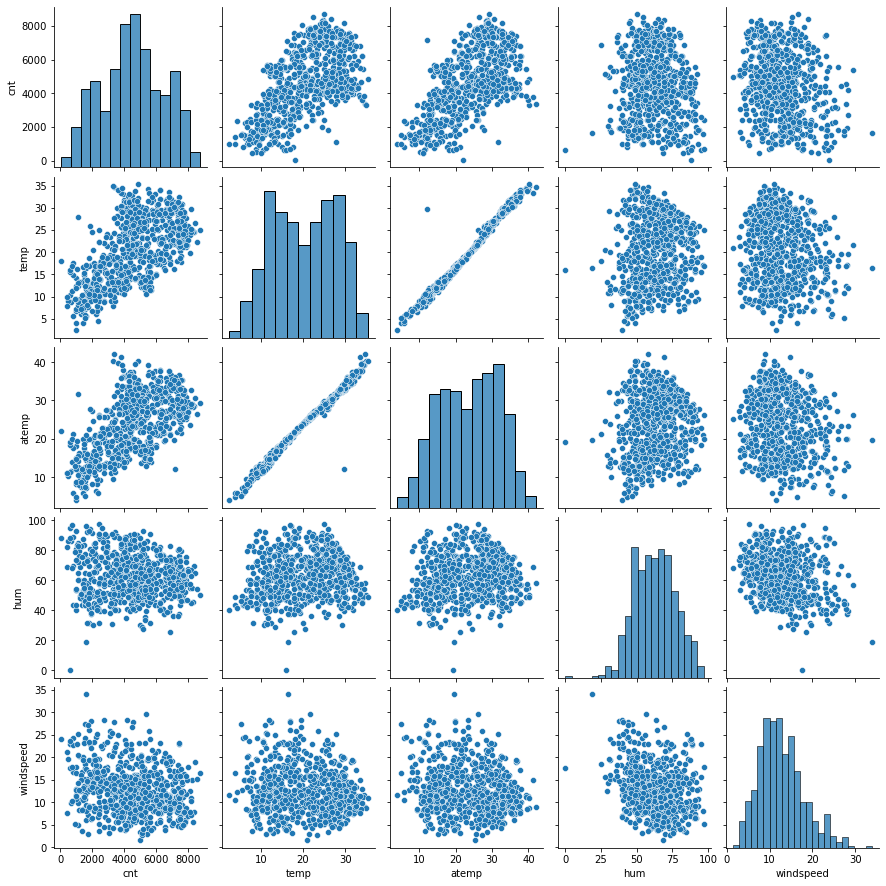

In [32]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bs_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

- So from the above plots we can clearly understand that temp and atemp are having high correlation
- And from the plots we can also say that there is alinear relationship between temp and atemp

#### Visualising categorical Variables



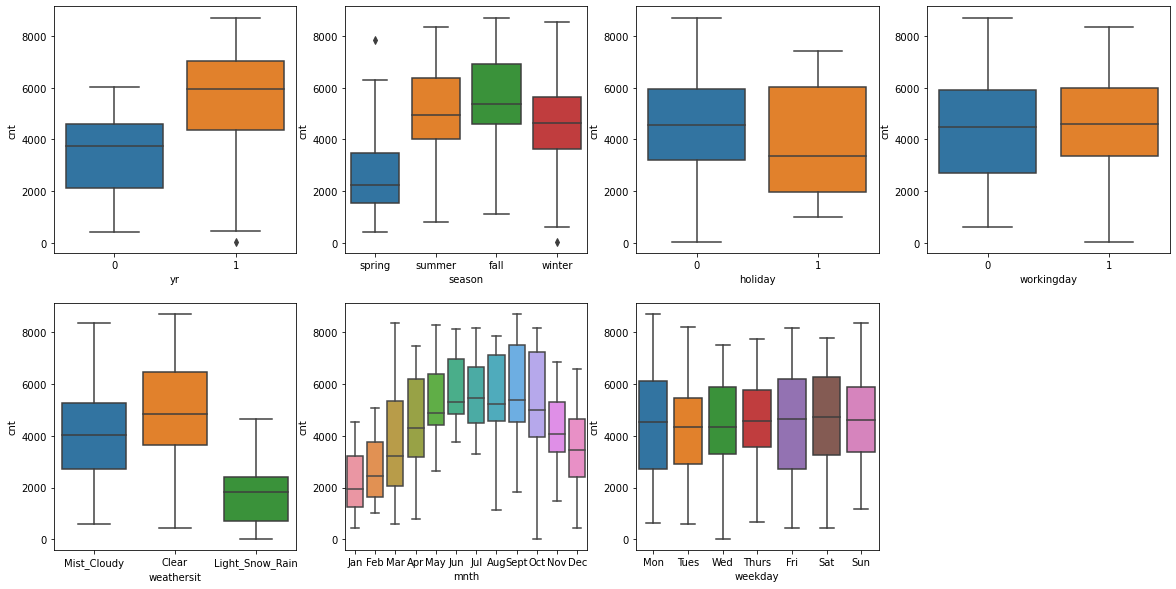

In [418]:
plt.figure(figsize=(20, 10))

plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bs_data)

plt.subplot(2,4,2)
sns.boxplot(x = 'season', y = 'cnt', data = bs_data)

plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bs_data)

plt.subplot(2,4,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bs_data)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bs_data)

plt.subplot(2,4,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = bs_data)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = bs_data)

plt.show()



In [419]:
# All categorical variables in the dataset
bs_data_categorical=bs_data.select_dtypes(exclude=['float64','datetime64','int64'])
print(bs_data_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [420]:
# All numeric variables in the dataset
bs_data_numeric = bs_data.select_dtypes(include=['float64'])
bs_data_numeric.head()

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300


In [421]:
# we can see that numeric data with float64 dataype doenst contain cnt variable. So we will convert cnt
#datatype int64 to float64
bs_data['cnt']=bs_data['cnt'].astype('float64')

In [422]:
# All numeric variables in the dataset
bs_data_numeric = bs_data.select_dtypes(include=['float64'])
bs_data_numeric.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985.0
1,14.902598,17.68695,69.6087,16.652113,801.0
2,8.050924,9.47025,43.7273,16.636703,1349.0
3,8.200000,10.60610,59.0435,10.739832,1562.0
4,9.305237,11.46350,43.6957,12.522300,1600.0



## Segmented Univariate Analysis

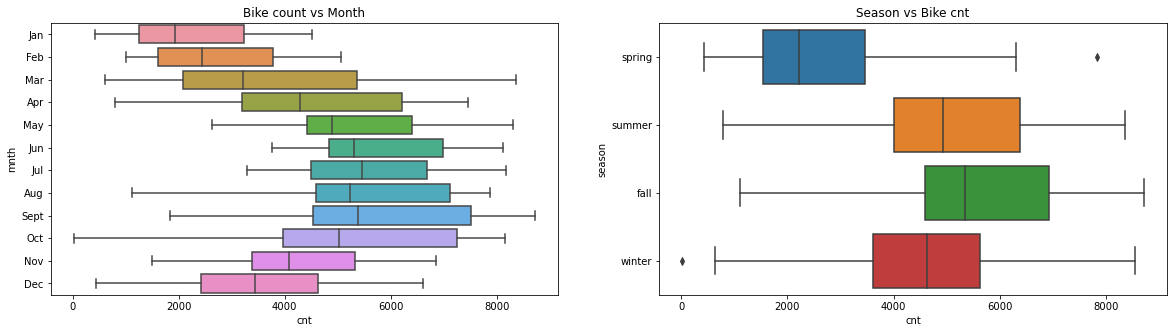

In [423]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='cnt', y=bs_data.mnth, data=bs_data)
plt.title('Bike count vs Month')
plt.subplot(122)
sns.boxplot(x='cnt', y=bs_data.season, data=bs_data)
plt.title('Season vs Bike cnt')
plt.show()

### Bivarient Analysis

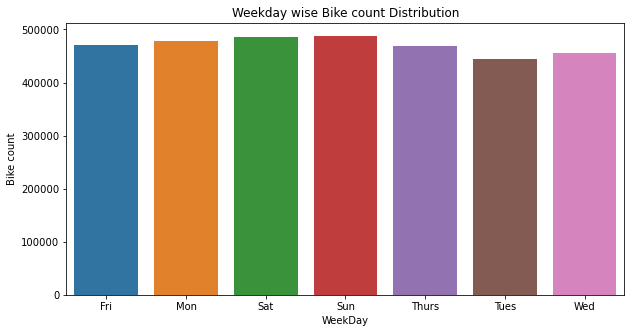

In [424]:
plt.figure(figsize=(10,5))
Month=bs_data.groupby("weekday").sum().reset_index()
sns.barplot(x='weekday',y='cnt',data=Month)
plt.xlabel('WeekDay')
plt.ylabel('Bike count')
plt.title('Weekday wise Bike count Distribution')
plt.show()

In [ ]:
# We can see that the demand is almost equally distributed through out the weekdays.

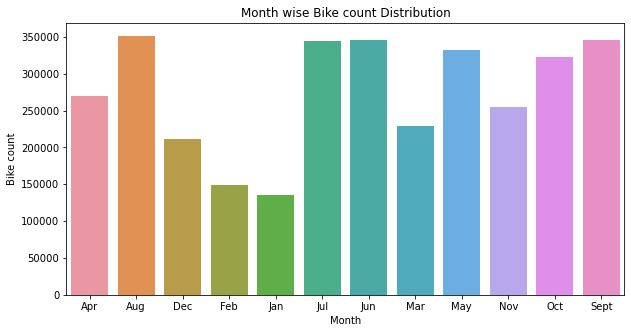

In [241]:
plt.figure(figsize=(10,5))
Month=bs_data.groupby("mnth").sum().reset_index()
sns.barplot(x='mnth',y='cnt',data=Month)
plt.xlabel('Month')
plt.ylabel('Bike count')
plt.title('Month wise Bike count Distribution')
plt.show()


In [ ]:
# We can see that Jan, Feb and Dec got less demand of bike rentals. This needs to be analysed and taken care of.

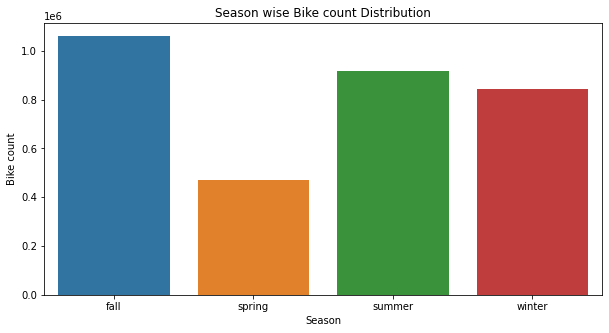

In [242]:
plt.figure(figsize=(10,5))
Season=bs_data.groupby("season").sum().reset_index()
sns.barplot(x='season',y='cnt',data=Season)
plt.xlabel('Season')
plt.ylabel('Bike count')
plt.title('Season wise Bike count Distribution')
plt.show()

In [ ]:
#We can see that season spring got less demand of bike rentals. This needs to be taken care off.

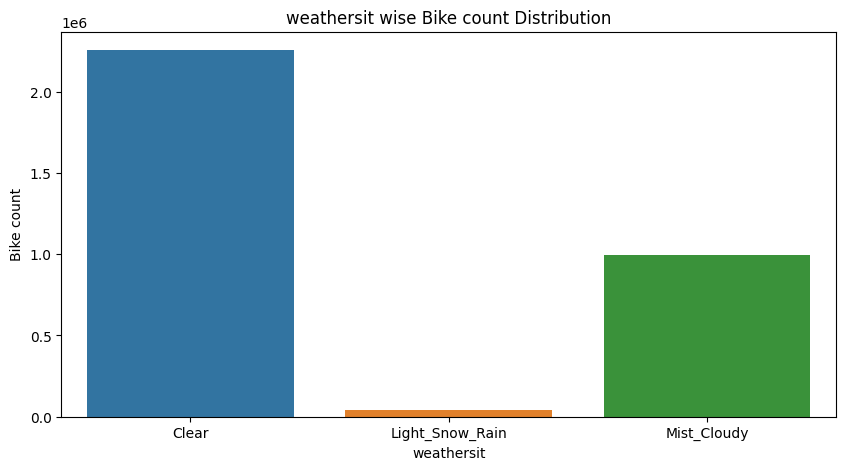

In [ ]:
plt.figure(figsize=(10,5))
weather=bs_data.groupby("weathersit").sum().reset_index()
sns.barplot(x='weathersit',y='cnt',data=weather)
plt.xlabel('weathersit')
plt.ylabel('Bike count')
plt.title('weathersit wise Bike count Distribution')
plt.show()

We can see that Light_Snow_Rain weather got a huge impact on the demand of bike, the bike rental count is extremely low in this weather.


<AxesSubplot:xlabel='holiday', ylabel='cnt'>

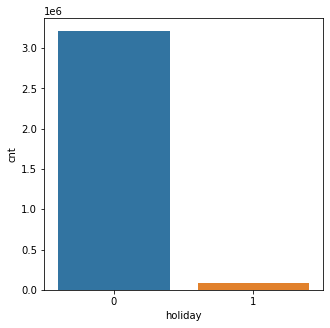

In [ ]:
plt.figure(figsize=(5,5))
Holiday=bs_data.groupby("holiday").sum().reset_index()
sns.barplot(x='holiday',y='cnt',data=Holiday)

In [ ]:
# Holidays got an huge imapct on the demand of bike, the rental count is shown very low.

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

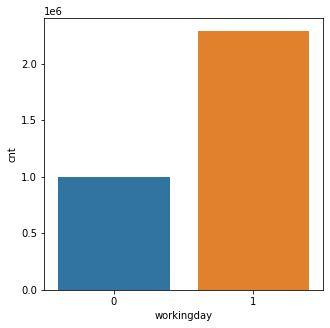

In [ ]:
plt.figure(figsize=(5,5))
workingday=bs_data.groupby("workingday").sum().reset_index()
sns.barplot(x='workingday',y='cnt',data=workingday)

In [ ]:
#The demand of bike on working day is very high

# Correlation Analysis using HeatMap

In [ ]:
# Correlation matrix
bs_data.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


<AxesSubplot:>

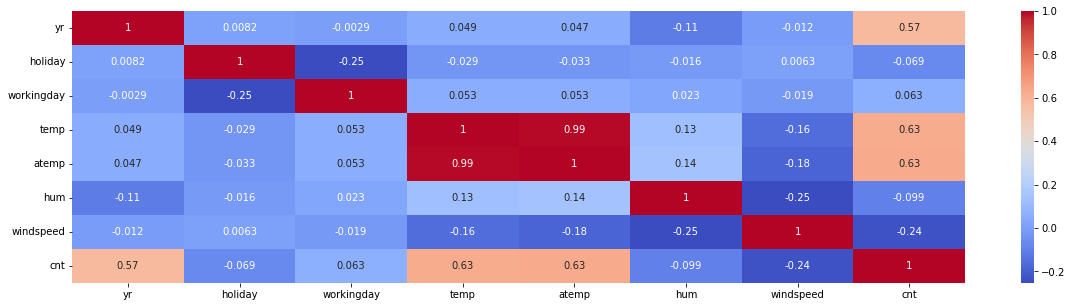

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(bs_data.corr(),cmap="coolwarm",annot=True)


Correlation betweeen numeric features

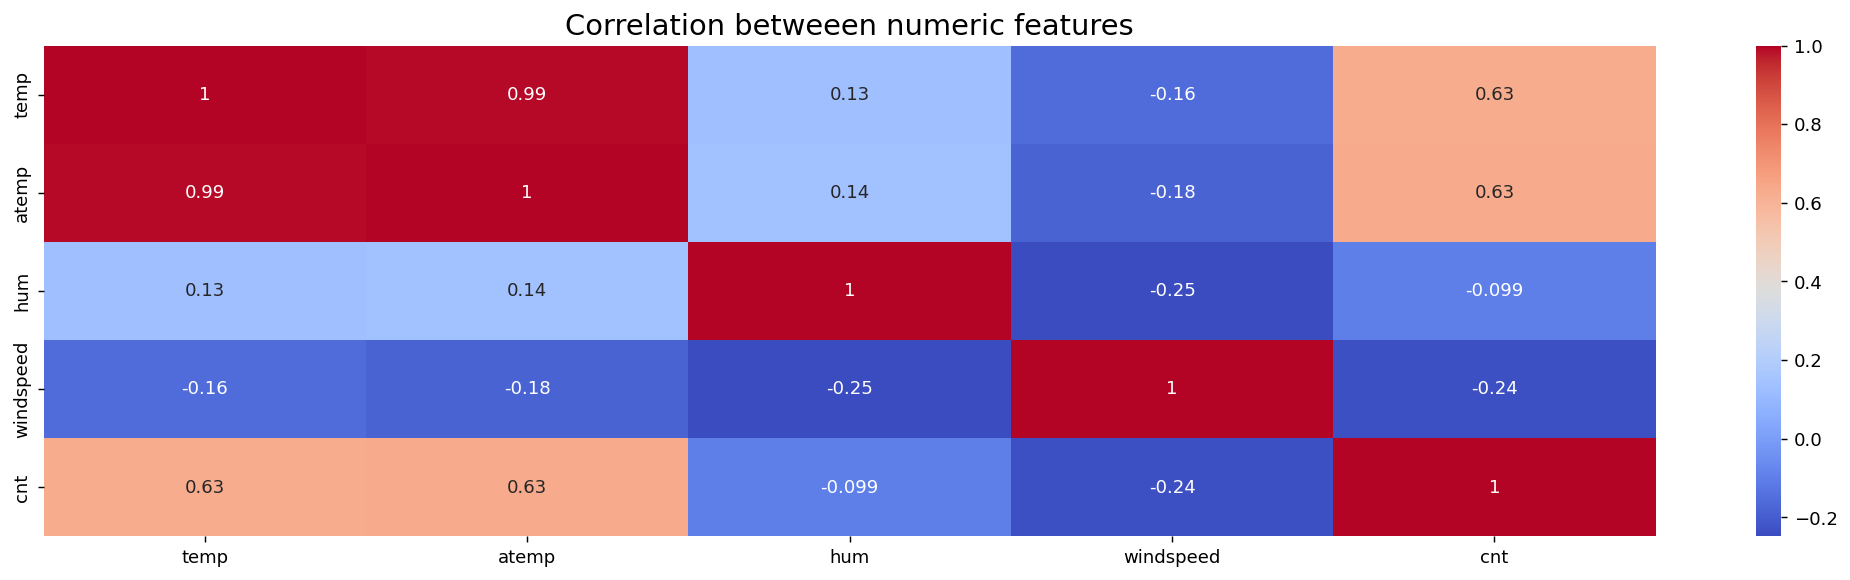

In [ ]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(20,5),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(bs_data[num_features].corr(),annot= True,cmap="coolwarm")
plt.show()

Analysis based on heatmap:
Correlation of 'cnt' with independent variables:
- 'cnt' is positively correlated with 'temp' and 'atemp' variable

- Count is negatively correlated to 'windspeed' (-0.24 ). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.


- Count is negatively correlated to 'hum' (-0.099 ). This gives us an impression that the shared bikes demand will be  less on humidity days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.




## 3. Data Preparation


#### Data Preparation

Let's  prepare the data and build the model.


#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers.

For this, we will use something called `dummy variables`.

In [426]:
bS_day_categorical=bs_data.select_dtypes(include=['object'])
bS_day_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,Mist_Cloudy
1,spring,Jan,Tues,Mist_Cloudy
2,spring,Jan,Wed,Clear
3,spring,Jan,Thurs,Clear
4,spring,Jan,Fri,Clear


In [427]:
# Convert into dummies
bS_day_dummies = pd.get_dummies(bS_day_categorical, drop_first=True)
bS_day_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [428]:
bs_data = pd.get_dummies(data=bs_data,columns=bs_data_categorical.columns,drop_first=True)

bs_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985.0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801.0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349.0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562.0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [429]:
bs_data.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues',
       'weekday_Wed', 'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [430]:
bs_data.dtypes

yr                              int64
holiday                         int64
workingday                      int64
temp                          float64
atemp                         float64
hum                           float64
windspeed                     float64
cnt                           float64
season_spring                   uint8
season_summer                   uint8
season_winter                   uint8
mnth_Aug                        uint8
mnth_Dec                        uint8
mnth_Feb                        uint8
mnth_Jan                        uint8
mnth_Jul                        uint8
mnth_Jun                        uint8
mnth_Mar                        uint8
mnth_May                        uint8
mnth_Nov                        uint8
mnth_Oct                        uint8
mnth_Sept                       uint8
weekday_Mon                     uint8
weekday_Sat                     uint8
weekday_Sun                     uint8
weekday_Thurs                   uint8
weekday_Tues

In [431]:
# we can see that all object variables-categorical variables are converted to 0 and 1 with datatype uint8

## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

### Steps:
- Create x and y
- Craete traine & test sets(70-30,80-20)-70 % will train model and 30% -test set - evaluate the model using model evaluation techniques
- Train your model on the training set (ie. learn the coefficients)
- Evaluate the model (training set, test set)

### Splitting data into train and test data

### First Method

In [433]:
bs_data.shape

(730, 30)

In [809]:
# Create X and y
X=bs_data.drop(['cnt'],axis=1)
y=bs_data['cnt'] # small y

In [810]:
# step 2:train-test split- 1ST METHOD
# we can write manual code to do it, SKlearn can minimize the efforts.
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=50)
X_train.shape

(510, 29)

In [350]:
X.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,1
1,2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,1,0,0,1
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


In [811]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(510, 29)
(220, 29)


### Scaling

We need to scale the variables for better interpretability, only for  the numeric columns and not the dummy variables.

In [812]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [813]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.707843,0.552655,0.545216,0.644402,0.317884,0.245098,0.254902,0.250980,...,0.086275,0.064706,0.135294,0.145098,0.143137,0.150980,0.133333,0.152941,0.031373,0.341176
std,0.500179,0.151726,0.455201,0.230616,0.223335,0.149118,0.167384,0.430568,0.436234,0.434003,...,0.281045,0.246248,0.342373,0.352545,0.350557,0.358381,0.340268,0.360284,0.174494,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.345522,0.524581,0.197845,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553497,0.556759,0.648347,0.295422,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.732269,0.752146,0.406471,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [814]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
172,0,0,1,0.865247,0.858891,0.729068,0.274549,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0.223565,0.236172,0.513954,0.243603,1,0,0,...,0,0,1,0,0,0,0,0,0,1
204,0,0,0,0.989306,1.000000,0.567625,0.267859,0,0,0,...,0,0,0,0,0,0,1,0,0,0
182,0,0,0,0.871664,0.821838,0.458136,0.150755,0,0,0,...,0,0,1,0,0,0,0,0,0,0
708,1,0,1,0.483446,0.498080,0.953198,0.313605,0,0,1,...,0,0,0,0,0,0,0,1,0,1


## #Simple Linear Regression Model

In [815]:
#Create the first Model
# add constant
X_train_sm=sm.add_constant(X_train['temp'])
#create first model
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.params)
print(lr.summary())


const    1484.117584
temp     5383.185426
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     351.2
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           5.93e-60
Time:                        21:13:27   Log-Likelihood:                -4450.6
No. Observations:                 510   AIC:                             8905.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [816]:
X_train_sm=sm.add_constant(X_train[['temp','hum']])
#create first model
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.params)
print(lr.summary())

const    2984.788413
temp     5604.256217
hum     -2518.374536
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     203.6
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.22e-65
Time:                        21:13:30   Log-Likelihood:                -4434.2
No. Observations:                 510   AIC:                             8874.
Df Residuals:                     507   BIC:                             8887.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [817]:
X_train_sm=sm.add_constant(X_train[['temp','hum','windspeed']])
#create first model
lr=sm.OLS(y_train,X_train_sm).fit()
print(lr.params)
print(lr.summary())

const        4208.872395
temp         5441.826025
hum         -3148.840394
windspeed   -2290.279043
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     156.6
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           8.64e-72
Time:                        21:13:34   Log-Likelihood:                -4417.1
No. Observations:                 510   AIC:                             8842.
Df Residuals:                     506   BIC:                             8859.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

 We can see that the R sqaured model is slowly improving from the initial value 0.409 with addition of each variables.
 But this method is very tedious in the case of large number of variables and adding variables one by one is a very difficult and time consuming process.

### SECOND METHOD


In [818]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bs_data, train_size=0.75, test_size=0.25, random_state=50)

In [819]:
np.asarray(df_train) # convert to array

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [820]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['cnt','hum','windspeed','temp','atemp']

df_train[var] = scaler.fit_transform(df_train[var])

In [821]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.486289,0.025594,0.700183,0.539238,0.540143,0.643969,0.317546,0.510981,0.248629,0.254113,...,0.084095,0.063985,0.13894,0.144424,0.140768,0.153565,0.135283,0.148080,0.029250,0.341865
std,0.500269,0.158066,0.458597,0.225899,0.222163,0.147268,0.167984,0.223525,0.432614,0.435760,...,0.277784,0.244951,0.34620,0.351841,0.348100,0.360861,0.342339,0.355505,0.168662,0.474769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333364,0.340723,0.528982,0.197183,0.352163,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.538962,0.550315,0.645771,0.294759,0.519673,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743521,0.730399,0.750751,0.406464,0.676254,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [822]:
y_train = df_train.pop('cnt')
X_train = df_train

In [823]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
98,0,0,0,0.353092,0.361592,0.904250,0.189757,0,1,0,...,0,0,1,0,0,0,0,0,0,1
396,1,0,1,0.510926,0.533818,0.523401,0.310919,1,0,0,...,0,0,0,0,0,0,0,0,0,0
175,0,0,0,0.792325,0.777362,0.498067,0.355294,0,0,0,...,0,0,1,0,0,0,0,0,0,0
454,1,0,0,0.454854,0.472056,0.760841,0.444127,0,1,0,...,0,0,1,0,0,0,0,0,0,1
234,0,0,1,0.724830,0.726048,0.469300,0.219363,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [824]:
#scale test set
#scale dftest-numerical variables
df_test[var] = scaler.transform(df_test[var])
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
333,0,0,1,0.331287,0.319837,0.632030,0.488582,0,0,1,...,0,0,0,0,0,0,0,0,0,0
203,0,0,0,0.984424,0.999138,0.515242,0.185727,0,0,0,...,0,0,1,0,0,0,0,0,0,0
279,0,0,1,0.562844,0.585986,0.705024,-0.049804,0,0,1,...,1,0,0,0,1,0,0,0,0,0
483,1,0,0,0.497426,0.511200,0.604980,0.154750,0,1,0,...,0,0,0,0,0,0,1,0,0,0
267,0,0,0,0.716524,0.679992,0.870760,0.010767,0,0,1,...,0,1,0,0,0,0,1,0,0,1


### Multiple Linear regression
### Build model using all variables

In [825]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                         0.269345
yr                            0.229520
holiday                       0.015034
workingday                    0.093630
temp                          0.315665
atemp                         0.118560
hum                          -0.200040
windspeed                    -0.167312
season_spring                -0.068615
season_summer                 0.026426
season_winter                 0.121327
mnth_Aug                      0.020204
mnth_Dec                     -0.066108
mnth_Feb                     -0.028270
mnth_Jan                     -0.053857
mnth_Jul                     -0.006918
mnth_Jun                      0.022663
mnth_Mar                      0.006260
mnth_May                      0.034392
mnth_Nov                     -0.075968
mnth_Oct                     -0.006579
mnth_Sept                     0.081766
weekday_Mon                   0.105085
weekday_Sat                   0.002313
weekday_Sun                   0.011227
weekday_Thurs            

In [826]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.2
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.26e-193
Time:                        21:14:16   Log-Likelihood:                 563.53
No. Observations:                 547   AIC:                            -1069.
Df Residuals:                     518   BIC:                            -944.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2693      0.035      7.739      0.000       0.201       0.338
yr                             0.2295      0.008     29.551      0.000       0.214       0.245
holiday                        0.0150      0.023      0.644      0.520      -0.031       0.061
workingday                     0.0936      0.012      7.778      0.000       0.070       0.117
temp                           0.3157      0.141      2.246      0.025       0.040       0.592
atemp                          0.1186      0.132      0.899      0.369      -0.141       0.378
hum                           -0.2000      0.038     -5.262      0.000      -0.275      -0.125
windspeed                     -0.1673      0.026     -6.559      0.000      -0.217      -0.117
season_spring                 -0.0686      0.029     -2.341      0.020      -0.126      -0.011
season_summer                  0.0264      0.024      1.095      0.274      -0.021       0.074
season_winter                  0.1213      0.029      4.239      0.000       0.065       0.178
mnth_Aug                       0.0202      0.033      0.621      0.535      -0.044       0.084
mnth_Dec                      -0.0661      0.033     -1.975      0.049      -0.132      -0.000
mnth_Feb                      -0.0283      0.032     -0.879      0.380      -0.091       0.035
mnth_Jan                      -0.0539      0.033     -1.614      0.107      -0.119       0.012
mnth_Jul                      -0.0069      0.033     -0.207      0.836      -0.073       0.059
mnth_Jun                       0.0227      0.024      0.938      0.349      -0.025       0.070
mnth_Mar                       0.0063      0.025      0.247      0.805      -0.044       0.056
mnth_May                       0.0344      0.020      1.714      0.087      -0.005       0.074
mnth_Nov                      -0.0760      0.036     -2.093      0.037      -0.147      -0.005
mnth_Oct                      -0.0066      0.035     -0.186      0.852      -0.076       0.063
mnth_Sept                      0.0818      0.031      2.631      0.009       0.021       0.143
weekday_Mon                    0.1051      0.014      7.734      0.000       0.078       0.132
weekday_Sat                    0.0023      0.014      0.161      0.872      -0.026       0.031
weekday_Sun                    0.0112      0.015      0.770      0.442      -0.017       0.040
weekday_Thurs                 -0.0060      0.014     -0.421      0.674      -0.034       0.022
weekday_Tues                   0.0556      0.013      4.144      0.000       0.029       0.082
weekday_Wed                   -0.0147      0.015     -1.011      0.313      -0.043       0.014
weathersit_Light_Snow_Rain    -0.2125      0.026     -8.169      0.000      -0.264      -0.161
weathersit_Mist_Cloudy        -0.0451      

#### Calculate VIF to identfy collinearity with variables

In [827]:
df1 = X_train
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                      Features    VIF
2                   workingday  92.77
3                         temp  69.85
4                        atemp  59.56
21                 weekday_Mon  18.35
25                weekday_Tues  17.70
7                season_spring  11.14
9                season_winter  10.52
8                season_summer   7.66
18                    mnth_Nov   7.05
19                    mnth_Oct   6.66
11                    mnth_Dec   6.34
10                    mnth_Aug   6.00
14                    mnth_Jul   5.76
13                    mnth_Jan   5.60
12                    mnth_Feb   5.20
1                      holiday   4.67
20                   mnth_Sept   4.02
16                    mnth_Mar   3.78
15                    mnth_Jun   3.19
17                    mnth_May   2.49
5                          hum   2.17
26                 weekday_Wed   1.85
24               weekday_Thurs   1.82
23                 weekday_Sun   1.79
22                 weekday_Sat   1.77
28      weat

In [828]:
#temp and atemp is highly correlated.
#VIF of temp and atemp is high
#VIF of workig day is high
#pvlue of temp is low where atemp is higher than temp
#so we avoid/ remove atemp and build the model again


 In this method we have t remove variables one by one based on its pvalue and VIF value.
In order to understand which variables are more significant or not, we can use RFE whether the variables have positive or negative support gainst the cnt variable

###  Model building using sklearn library

In [829]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [830]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.29520287e-01  1.72802527e+12  1.72802527e+12  2.76526997e-01
  1.44708217e-01 -2.19886129e-01 -1.81895142e-01 -6.56594410e-02
  2.25855134e-02  1.38981040e-01  1.90831791e-02 -9.40892463e-02
 -3.67191567e-02 -7.11749918e-02 -1.44958329e-02  6.49051467e-03
 -1.07475557e-02  3.73096897e-02 -1.08336345e-01 -3.66139472e-02
  8.28481464e-02  1.72802527e+12  5.72580621e-04  1.02744145e-02
  4.64531414e-04  1.72802527e+12 -1.33247218e-02 -2.06344869e-01
 -4.45461722e-02]
-1728025273718.7205


#### Model Building Using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [871]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm,n_features_to_select= 10)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True False  True  True  True  True  True False  True False False
 False False False False False False False False  True False False False
 False False False  True False]
[ 1  1  8  1  1  1  1  1 11  1 12  3  9  4 17 13 18  6  2 16  1  7 19 15
 20 10 14  1  5]


In [872]:
X_train.columns[ rfe1.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Sept', 'weathersit_Light_Snow_Rain'],
      dtype='object')

In [873]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', False, 17),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 18),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 16),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', False, 19),
 ('weekday_Sun', False, 15),
 ('weekday_Thurs', False, 20),
 ('weekday_Tues', False, 10),
 ('weekday_Wed', False, 14),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', False, 5)]

In [874]:
#Lets select the rfe support columns to build the model
X_train_rfe_col_1=X_train.columns[ rfe1.support_]

X_train_rfe_col_1

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Sept', 'weathersit_Light_Snow_Rain'],
      dtype='object')

In [876]:
X_train.columns[ ~rfe1.support_]

Index(['workingday', 'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [877]:
# dataframe with RFE selected variables
X_train_rfe_1 = X_train[X_train_rfe_col_1]

### Define functions to simplify the model building with reusability of code

In [878]:
#  function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [863]:
#Function to build a model using statsmodel api which takes columns as the parameter return the model object-lr
def create_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lr = sm.OLS(y_train, X_train_sm).fit()
    print(lr.summary())
    return lr


In [864]:
#Function to calculate vif and analyse with pvalues- which takes parameters columns and model object lr
def Analyze_model_with_VIF(cols,lr):

    df1 =X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    #print(vif.sort_values(by='VIF',ascending=False))

    # Get p-values from the model summary
    summary = lr.summary()
    p_values = pd.DataFrame(summary.tables[1].data, columns=["Features", "Coef", "Std Err", "t", "P-Value", "Conf","Interval"])


    #p_values = p_values.iloc[1:, [0, 4]]  # Select only Feature_Variable and P-Value columns and remove the header row
    p_values = p_values.iloc[1:, [0, 1,4]]  # Select only Feature_Variable and P-Value columns and remove the header row
    # Merge VIF and P-Value dataframes
    vif_p_values_df = pd.merge(vif, p_values, on="Features")
    
    # Sort the filtered table by low p-values and low VIF
    sorted_table = vif_p_values_df.sort_values(by=["P-Value", "VIF"], ascending=[True, True])

    print(sorted_table)

In [865]:
#Function to calculate RFE- which takes paarmeters X_dataframe,y_dataframe & n_feature
def calculate_RFE(X_dataframe,y_dataframe,n_features):

    rfe1 = RFE(lm,n_features_to_select= n_features)

    rfe1.fit(X_dataframe, y_dataframe)
    #print("RFE Support Variables:",X_train.columns[rfe1.support_])

    # Create a DataFrame to display the results
    #result_df = pd.DataFrame({'Features': X_train.columns, 'RFE Support': rfe1.support_})
    supported_rankings = [rfe1.ranking_[i] for i, support in enumerate(rfe1.support_) if support]

    result_df = pd.DataFrame({'Features': X_train.columns[rfe1.support_], 'RFE Ranking':  supported_rankings})
    #print(result_df)
    return X_train.columns[rfe1.support_]

### Build Model I

In [879]:
calculateVIF(X_train_rfe_1)


,Features,VIF
3,atemp,379.85
2,temp,374.20
4,hum,15.10
5,windspeed,4.12
6,season_spring,2.50
7,season_winter,2.01
0,yr,1.96
9,weathersit_Light_Snow_Rain,1.13
8,mnth_Sept,1.12
1,holiday,1.04


In [880]:
# lets remove 'atemp' since it has got highest VIF value-high multiillinearity with temp value.

X_train_rfe_1=X_train_rfe_1.drop(['atemp'],axis=1)
lr=create_model(X_train_rfe_1.columns)
Analyze_model_with_VIF(X_train_rfe_1.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     288.2
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          3.66e-199
Time:                        21:18:35   Log-Likelihood:                 526.10
No. Observations:                 547   AIC:                            -1032.
Df Residuals:                     537   BIC:                            -989.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [881]:
# lets remove 'hum' since it has got highest VIF value

X_train_rfe_1=X_train_rfe_1.drop(['hum'],axis=1)
lr=create_model(X_train_rfe_1.columns)
Analyze_model_with_VIF(X_train_rfe_1.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     270.9
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          3.47e-183
Time:                        21:18:37   Log-Likelihood:                 485.62
No. Observations:                 547   AIC:                            -953.2
Df Residuals:                     538   BIC:                            -914.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [890]:
# lets remove 'mnth_Sept' since it has got less coefficient

X_train_rfe_1=X_train_rfe_1.drop(['mnth_Sept'],axis=1)
lr=create_model(X_train_rfe_1.columns)
Analyze_model_with_VIF(X_train_rfe_1.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     304.1
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.32e-182
Time:                        21:22:21   Log-Likelihood:                 481.31
No. Observations:                 547   AIC:                            -946.6
Df Residuals:                     539   BIC:                            -912.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [891]:
# lets remove 'season_winter' since it has got less coefficient

X_train_rfe_1=X_train_rfe_1.drop(['season_winter'],axis=1)
lr=create_model(X_train_rfe_1.columns)
Analyze_model_with_VIF(X_train_rfe_1.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     345.4
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          3.33e-181
Time:                        21:22:24   Log-Likelihood:                 475.01
No. Observations:                 547   AIC:                            -936.0
Df Residuals:                     540   BIC:                            -905.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Here we can see thet the pvalues and VIF of variables are normalized and we can conclude this as model outcome.

We can see that mnth_sept is correlated with variable 'temp' and we can remove mnth_sep to avoid multicollinearity


<AxesSubplot:>

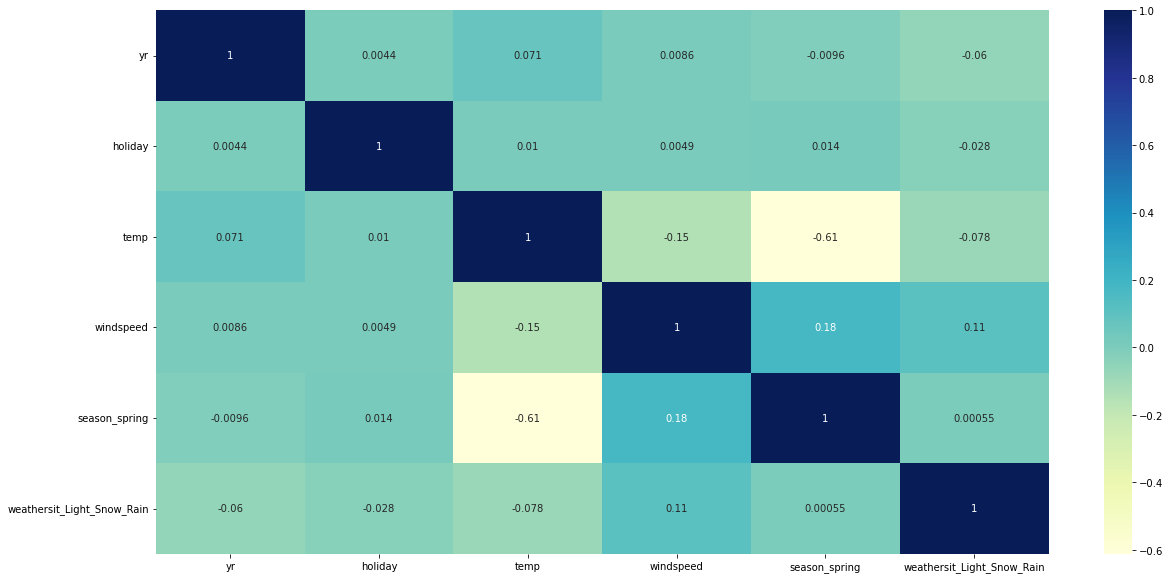

In [892]:
#check correlation between variables

plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe_1.corr(),annot=True,cmap='YlGnBu')

Now we got a heatmap with decent correlation with variables and it is good to go

### Residual Analysis-Model I

Before we make predictions on the test set, let's first analyse the residuals.

In [893]:
# Subsetting training data for 10 selected columns
X_train_sm_1 = X_train[X_train_rfe_1.columns]

# Add a constant to the model
X_train_sm_1 = sm.add_constant(X_train_sm_1)
lr_train_model_1=sm.OLS(y_train, X_train_sm_1).fit()
print(lr_train_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     345.4
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          3.33e-181
Time:                        21:22:31   Log-Likelihood:                 475.01
No. Observations:                 547   AIC:                            -936.0
Df Residuals:                     540   BIC:                            -905.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [894]:
y_train_pred_1 = lr.predict(X_train_sm_1)

In [895]:

#Plot a histogram of the error terms
def plot__train_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')






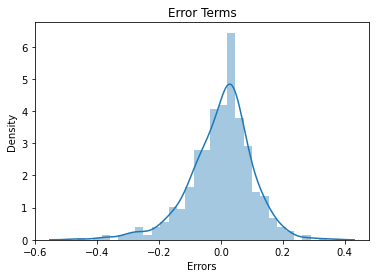

In [896]:
plot__train_res_dist(y_train, y_train_pred_1)

In [897]:
print(r2_score(y_train,y_train_pred_1))

0.7932754624941712


In [898]:
X_test_sm_1=X_test[X_train_rfe_1.columns]
X_test_sm_1 = sm.add_constant(X_test_sm_1)
lr_test_model_1=sm.OLS(y_test, X_test_sm_1).fit()

lr_test_model_1.params
lr_test_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           2.82e-54
Time:                        21:22:43   Log-Likelihood:                 154.02
No. Observations:                 183   AIC:                            -294.0
Df Residuals:                     176   BIC:                            -271.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3000      0.035      8.477      0.000       0.230       0.370
yr                             0.2509      0.016     15.771      0.000       0.220       0.282
holiday                       -0.0685      0.041     -1.657      0.099      -0.150       0.013
temp                           0.3245      0.044      7.344      0.000       0.237       0.412
windspeed                     -0.1159      0.049     -2.375      0.019      -0.212      -0.020
season_spring                 -0.1707      0.024     -7.035      0.000      -0.219      -0.123
weathersit_Light_Snow_Rain    -0.2350      0.050     -4.746      0.000      -0.333      -0.137
==============================================================================
Omnibus:                        5.757   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.716
Skew:                          -0.433   Prob(JB):                       0.0574
Kurtosis:                       2.997   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [899]:
# Making predictions
y_test_pred_1 = lr.predict(X_test_sm_1)

Text(0, 0.5, 'y_test_pred_1')

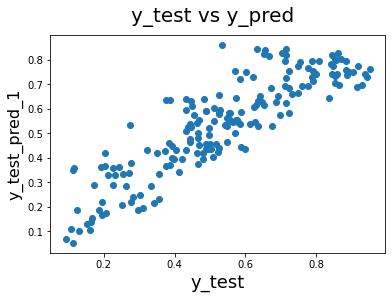

In [900]:

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred_1', fontsize = 16)

In [901]:
print(r2_score(y_test,y_test_pred_1))

0.7693471233333826


Thus, for the model with 6 variables, the r2_score  on training and test data is about 79.3% and 76.9% respectively. 
The adjusted r-squared on the test set is about is about 76.7%.

# Model II-RFE(15)

In [902]:

cols=  calculate_RFE(X_train,y_train,15) #call function to get the rfe support variables
X_train_rfe_2=X_train[cols]

In [903]:

lr=create_model(X_train_rfe_2.columns) # call function to create model
Analyze_model_with_VIF(X_train_rfe_2.columns,lr) # call function to nalyse VIF vaalue with pvalue of feature variables

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.0
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.30e-201
Time:                        21:25:14   Log-Likelihood:                 548.93
No. Observations:                 547   AIC:                            -1066.
Df Residuals:                     531   BIC:                            -997.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [904]:
# lets remove 'atemp' since it has got highest VIF value because of multicollinearity. so lets remove 'atemp'

X_train_rfe_2=X_train_rfe_2.drop(['atemp'],axis=1)
lr=create_model(X_train_rfe_2.columns)
Analyze_model_with_VIF(X_train_rfe_2.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.16e-202
Time:                        21:25:17   Log-Likelihood:                 548.66
No. Observations:                 547   AIC:                            -1067.
Df Residuals:                     532   BIC:                            -1003.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [905]:
# lets remove 'hum' since it has got highest VIF value

X_train_rfe_2=X_train_rfe_2.drop(['hum'],axis=1)
lr=create_model(X_train_rfe_2.columns)
Analyze_model_with_VIF(X_train_rfe_2.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     204.2
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          3.02e-197
Time:                        21:25:20   Log-Likelihood:                 533.02
No. Observations:                 547   AIC:                            -1038.
Df Residuals:                     533   BIC:                            -977.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<AxesSubplot:>

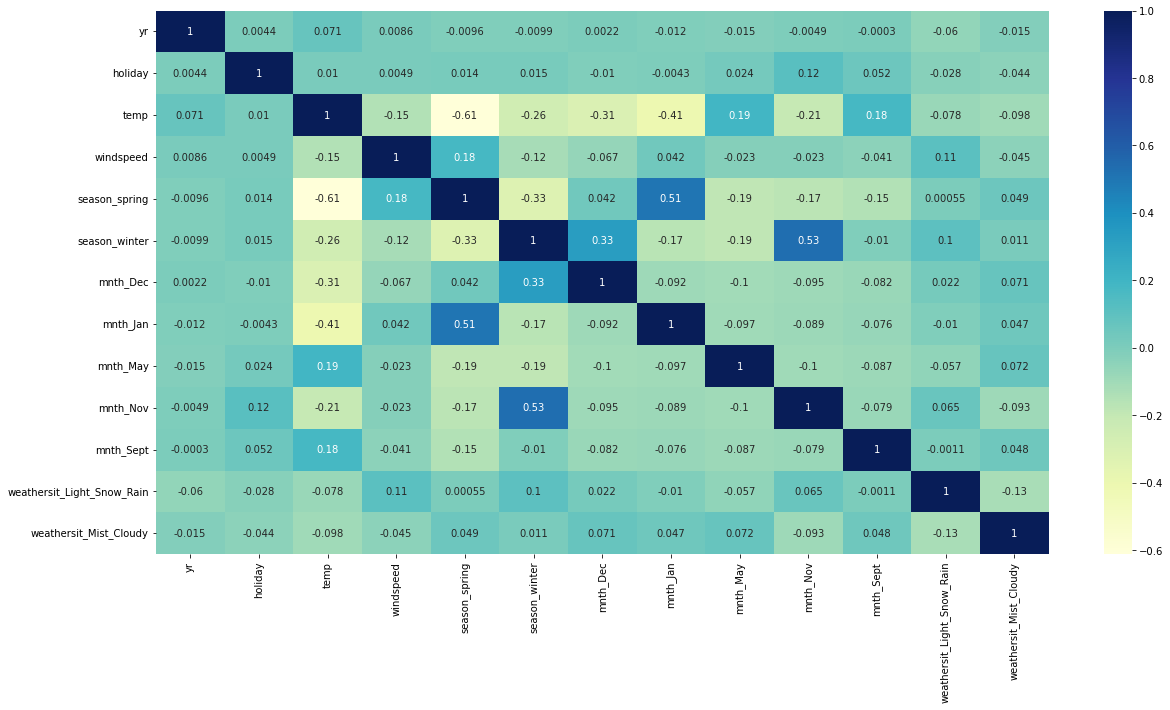

In [907]:
#check the correlation with variables

plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe_2.corr(),annot=True,cmap='YlGnBu')

In [ ]:
# we can see that month of November is correlated with season_winter and
#also we can see that month jan and season_spring is correlated
#also we can see that month Dec and season_winter is correlated
#This will cause multicillinearity and we have to remove it.

In [908]:
X_train_rfe_2=X_train_rfe_2.drop(['mnth_Nov'],axis=1)
lr=create_model(X_train_rfe_2.columns)
Analyze_model_with_VIF(X_train_rfe_2.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     213.8
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          5.51e-195
Time:                        21:25:33   Log-Likelihood:                 524.87
No. Observations:                 547   AIC:                            -1024.
Df Residuals:                     534   BIC:                            -967.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [909]:
X_train_rfe_2=X_train_rfe_2.drop(['mnth_Jan'],axis=1)
lr=create_model(X_train_rfe_2.columns)
Analyze_model_with_VIF(X_train_rfe_2.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     230.5
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          7.15e-195
Time:                        21:25:36   Log-Likelihood:                 521.78
No. Observations:                 547   AIC:                            -1020.
Df Residuals:                     535   BIC:                            -967.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [910]:
# mnth_Dec is correlated with season_winter,so lets remove it
X_train_rfe_2=X_train_rfe_2.drop(['mnth_Dec'],axis=1)
lr=create_model(X_train_rfe_2.columns)
Analyze_model_with_VIF(X_train_rfe_2.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     251.9
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          2.85e-195
Time:                        21:25:40   Log-Likelihood:                 519.86
No. Observations:                 547   AIC:                            -1018.
Df Residuals:                     536   BIC:                            -970.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [911]:
# mnth_May is correlated with variable temp, so lets remove it

X_train_rfe_2=X_train_rfe_2.drop(['mnth_May'],axis=1)
lr=create_model(X_train_rfe_2.columns)
Analyze_model_with_VIF(X_train_rfe_2.columns,lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     278.6
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          6.97e-196
Time:                        21:25:46   Log-Likelihood:                 518.39
No. Observations:                 547   AIC:                            -1017.
Df Residuals:                     537   BIC:                            -973.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

We can see that now the variables have normalized with VIF and pvalues.

<AxesSubplot:>

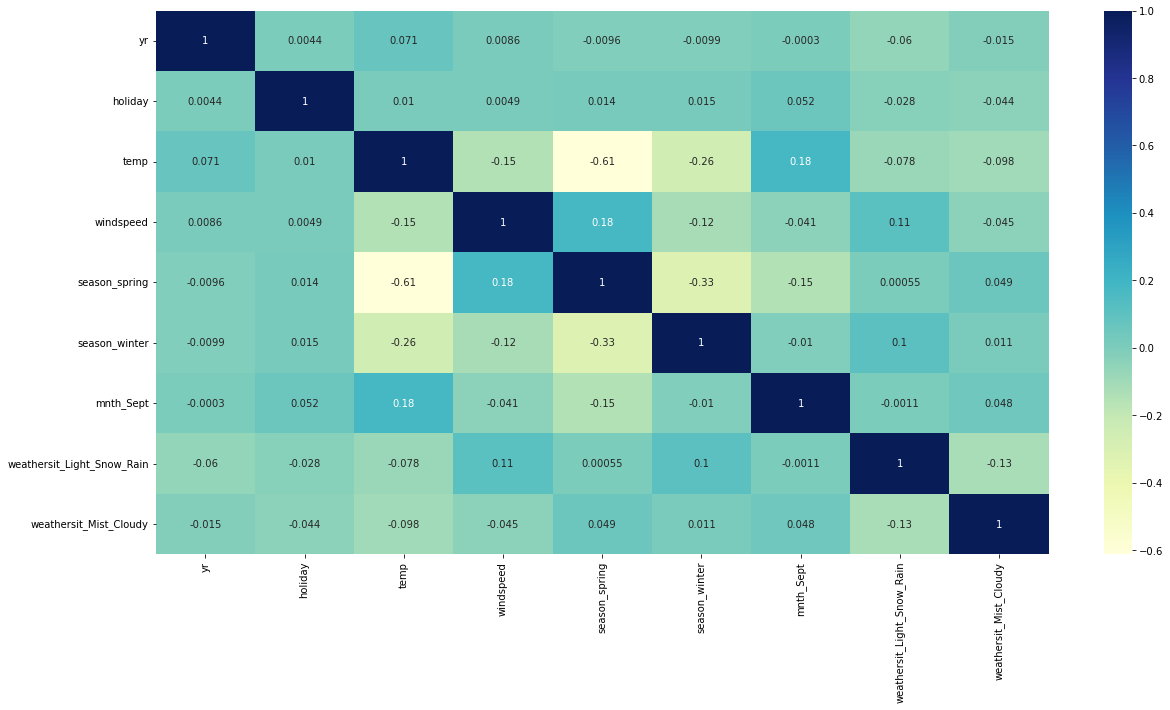

In [913]:
#check the correlation between variables
plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe_2.corr(),annot=True,cmap='YlGnBu')

Now we can see that the correlation between variables are very low. So we can proceed with this model.

In [914]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train[X_train_rfe_2.columns], y_train)

LinearRegression()

In [915]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23276567 -0.09983187  0.42705551 -0.12064276 -0.12174391  0.04547586
  0.06210238 -0.26821364 -0.07190572]
0.25595259028605366


### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [916]:
# Subsetting training data for 10 selected columns
X_train_sm_2 = X_train[X_train_rfe_2.columns]

# Add a constant to the model
X_train_sm_2 = sm.add_constant(X_train_sm_2)
lr_train_model_2=sm.OLS(y_train, X_train_sm_2).fit()
print(lr_train_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     278.6
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          6.97e-196
Time:                        21:31:18   Log-Likelihood:                 518.39
No. Observations:                 547   AIC:                            -1017.
Df Residuals:                     537   BIC:                            -973.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [917]:
y_train_pred_2 = lr.predict(X_train_sm_2)


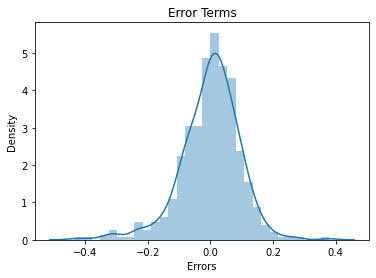

In [919]:
#Plot a histogram of the error terms
plot__train_res_dist(y_train, y_train_pred_2)

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

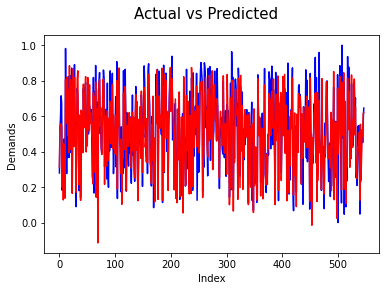

In [920]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred_2, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# Prediction on Trained Model

Evaluate R-sqaured value

In [921]:
r2_score(y_train,y_train_pred_2)

0.8235946120283087

In [922]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
333,0,0,1,0.331287,0.319837,0.632030,0.488582,0,0,1,...,0,0,0,0,0,0,0,0,0,0
203,0,0,0,0.984424,0.999138,0.515242,0.185727,0,0,0,...,0,0,1,0,0,0,0,0,0,0
279,0,0,1,0.562844,0.585986,0.705024,-0.049804,0,0,1,...,1,0,0,0,1,0,0,0,0,0
483,1,0,0,0.497426,0.511200,0.604980,0.154750,0,1,0,...,0,0,0,0,0,0,1,0,0,0
267,0,0,0,0.716524,0.679992,0.870760,0.010767,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [923]:
X_test_sm_2=X_test[X_train_rfe_2.columns]
X_test_sm_2 = sm.add_constant(X_test_sm_2)
lr_model_test_2=sm.OLS(y_test, X_test_sm_2).fit()

lr_model_test_2.params

const                         0.272486
yr                            0.250588
holiday                      -0.057014
temp                          0.339709
windspeed                    -0.061965
season_spring                -0.142878
season_winter                 0.058570
mnth_Sept                     0.073613
weathersit_Light_Snow_Rain   -0.293086
weathersit_Mist_Cloudy       -0.083270
dtype: float64

In [924]:
lr_model_test_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     88.98
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.53e-60
Time:                        21:31:54   Log-Likelihood:                 175.82
No. Observations:                 183   AIC:                            -331.6
Df Residuals:                     173   BIC:                            -299.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2725      0.040      6.841      0.000       0.194       0.351
yr                             0.2506      0.014     17.578      0.000       0.222       0.279
holiday                       -0.0570      0.037     -1.538      0.126      -0.130       0.016
temp                           0.3397      0.046      7.410      0.000       0.249       0.430
windspeed                     -0.0620      0.045     -1.367      0.173      -0.151       0.027
season_spring                 -0.1429      0.026     -5.576      0.000      -0.193      -0.092
season_winter                  0.0586      0.020      2.912      0.004       0.019       0.098
mnth_Sept                      0.0736      0.022      3.376      0.001       0.031       0.117
weathersit_Light_Snow_Rain    -0.2931      0.045     -6.473      0.000      -0.382      -0.204
weathersit_Mist_Cloudy        -0.0833      0.015     -5.404      0.000      -0.114      -0.053
==============================================================================
Omnibus:                       16.319   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.249
Skew:                          -0.680   Prob(JB):                     0.000109
Kurtosis:                       3.737   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [925]:
# Making predictions
y_test_pred_2 = lr.predict(X_test_sm_2)

Text(0, 0.5, 'y_test_pred_2')

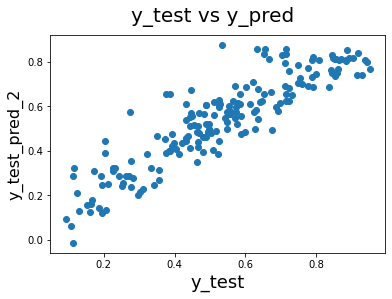

In [926]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred_2', fontsize = 16)

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [927]:
# r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred_2)

0.8082978608887913

Thus, for the model with 9 variables, the r2_score  on training and test data is about 82.3% and 80.8% respectively. The adjusted r-squared on the test set is about is about 81.3%.

#### Checking the correlations between the final predictor variables

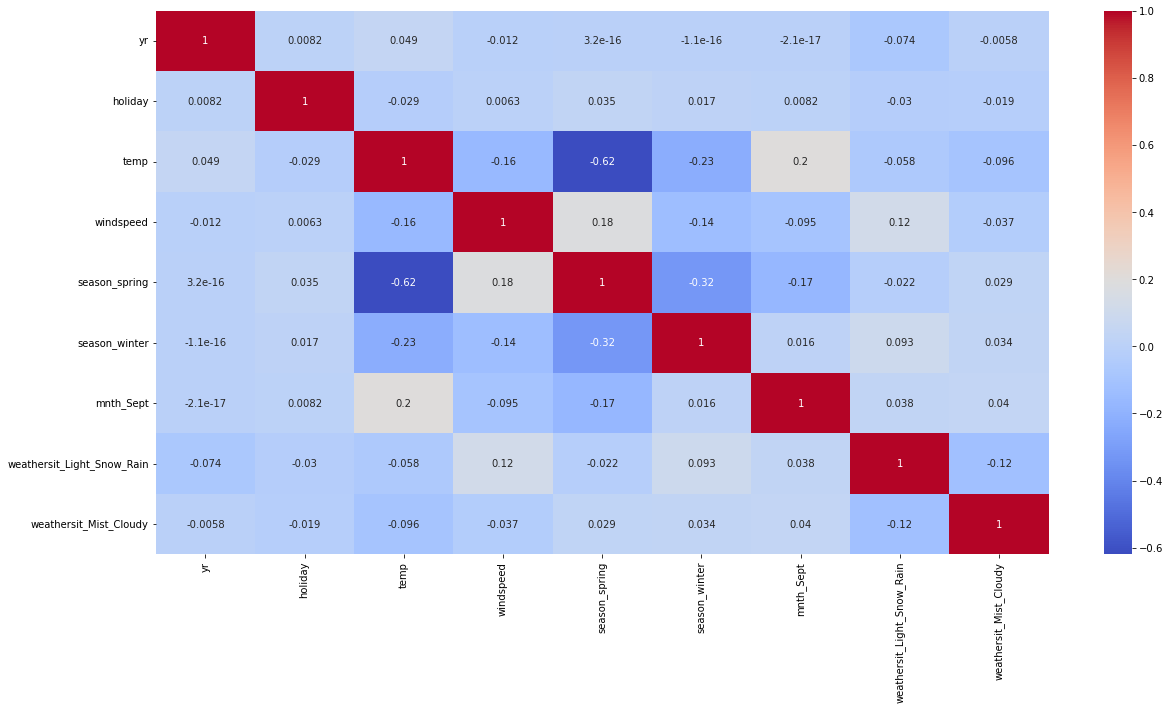

In [928]:
# Figure size
plt.figure(figsize=(20,10))

# Heatmap
sns.heatmap(bs_data[X_train_rfe_2.columns].corr(), cmap="coolwarm", annot=True)
plt.show()

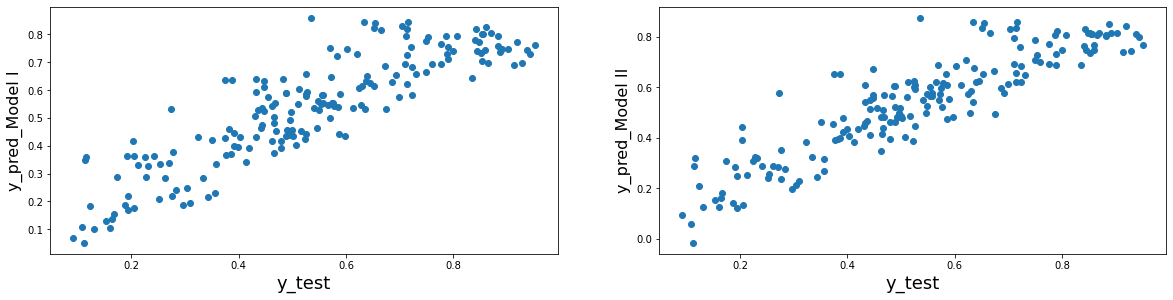

In [929]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
plt.scatter(y_test, y_test_pred_1)
fig.suptitle('y_pred_Model I', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_Model I', fontsize = 16)


plt.subplot(2,2,2)
plt.scatter(y_test, y_test_pred_2)
fig.suptitle('y_pred_Model II', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_Model II', fontsize = 16)
plt.show()

### As you can see both models are looking pretty doing well.
But Model II spread in the scatter plot looks more appealing


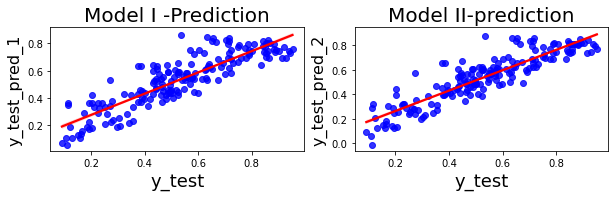

In [930]:
# Visualizing the fit on the test data
# plotting a Regression plot


plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.regplot(x=y_test, y=y_test_pred_1, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Model I -Prediction', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred_1', fontsize=16)


plt.subplot(2,2,2)
sns.regplot(x=y_test, y=y_test_pred_2, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Model II-prediction', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred_2', fontsize=16)
plt.show()

We can see that the spread in Model I is pretty good than Model II

We have created Model I using a RFE(10) and Model  II using a RFE(15) and obtained the 6 and 9  feature significant variables respectively.

As we can see the fit is better in Model II , we can use Model II for the prediction


In [931]:
#Now, lets analyse the values  of both models 

#### Model 1:
- Train dataset R-squared          : 0.793
- Train dataset Adjusted R-squared : 0.791
- Train dataset r2_score           : 0.793

- Test dataset R-squared          : 0.775
- Test dataset Adjusted R-squared : 0.767
- Test dataset r2_score           : 0.769

#### Model II:
- Train dataset R-squared          : 0.824
- Train dataset Adjusted R-squared : 0.821
- Train dataset r2_score           : 0.823

- Test dataset R-squared           : 0.822
- Test dataset Adjusted R-squared  : 0.813    
- Test dataset r2_score            : 0.808

We will select  Model II  for the prediction. The final predictors in Model II seem to have fairly low correlations.

Thus, the final model consists of the 9 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.



Significant variables


In [932]:
X_train_rfe_2.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Sept', 'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [933]:
X_train=X_train[X_train_rfe_2.columns]

top_variables=calculate_RFE(X_train,y_train,3)
top_variables

Index(['yr', 'temp', 'weathersit_Light_Snow_Rain'], dtype='object')

Most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

In [943]:
# Instantiate
lm = LinearRegression() # using sklearn

# Fit a line
lm.fit(X_train_sm_2, y_train) # find the coefficients of train set
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.          0.23276567 -0.09983187  0.42705551 -0.12064276 -0.12174391
  0.04547586  0.06210238 -0.26821364 -0.07190572]
0.2559525902860542


### Conclusion

The equation to predict the demand of bike provided by Model II is

cnt=0.2327*yr+-0.0998*holiday +0.427*temp +-0.120*windspeed +-121*season_spring +0.0454*season_winter +0.0621*mnth_Sept
+-0.268*weathersit_Light_Snow_Rain +-0.0719*weathersit_Mist_Cloudy

which explains that each 1 unit increase in the feature variable
- 'yr' will cause 0.2327 unit increase in bike demand count                         : positive impact

- 'holiday' will cause -0.0998 unit decrease in bike demand count                   : negative impact

- 'temperatue' will cause 0.427 unit increase in bike demand count                  :positive impact

- 'windspeed' will cause -0.120 unit decrease in bike demand count                  :negative impact

- 'season_spring' will cause -0.121 unit decrease in bike demand count              :negative impact

- 'season_winter' will cause 0.0454 unit increase in bike demand count              :positive impact

- 'mnth_Sept' will cause 0.0621 unit increase in bike demand count                  :positive impact

- 'weathersit_Light_Snow_Rain' will cause -0.268 unit decrease in bike demand count :negative impact

- 'weathersit_Mist_Cloudy' will cause -0.0719 unit decrease in bike demand count    :negative impact


#### Significant variables to predict the demand for shared bikes



Significant variables to predict the demand for shared bikes are the below which is obtained from Model II
- yr
- holiday
- temp
- windspeed
- season_spring
- season_winter
- mnth_Sept
- weathersit_Light_Snow_Rain
- weathersit_Mist_Cloudy



#### Top 3 Significant variables to predict the demand for shared bikes
- yr
- temp
- weathersit_Light_Snow_Rain'

### Analysis & Suggestions

- holidays, bad weather conditions, spring_season, windspeed can contribute less demand in bike rental. 
So company can come up with some offer program to the attract theh customer or with some loyalty programs 
where the customer can redeem loyaty while payment for using the bikes.

- We can see that each year the sales increase, so company can come up with new  strategies to improve the sales
- temperature conditions contribute towards a positive impact towards the bike rentals.
- season_winter,mnth_Sep got high demand of bike and company should make sure of providing enough bikes as per the demand.